<a href="https://colab.research.google.com/github/StreetBta/DS_Fabian/blob/main/Actividadclase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly

In [ ]:
df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Colab Notebooks/BTC-USD.csv'
                ,sep = ',',
                 decimal = '.')
df_p = df
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


In [ ]:
df['Open'].mean()
print(df['Open'].mean())
print(df['Open'].median())
print(df['Open'].mode()[0])

11668.600272022568
6371.850098
233.421997


In [ ]:
df['Open'].quantile(np.arange(0.25,1,0.05))

0.25      609.122009
0.30      789.586817
0.35     1542.464001
0.40     3630.420020
0.45     4384.447119
0.50     6371.850098
0.55     7070.316894
0.60     7985.100293
0.65     8836.177148
0.70     9620.122070
0.75    10728.271484
0.80    13549.667383
0.85    33732.281250
0.90    42215.165625
0.95    50563.971094
Name: Open, dtype: float64

In [ ]:
Open = df['Open']
Q1 = Open.quantile(0.25)
Q2 = Open.quantile(0.75)
print("Q1 =",Q1," Q2 =", Q2)

Q1 = 609.1220089999999  Q2 = 10728.271484500001


In [ ]:
IQR = Q2-Q1
print("IQR =", IQR)

IQR = 10119.1494755


In [ ]:
print('limite inferior', Q1-(1.5*IQR))
print('limite superior', Q2+(1.5*IQR))

limite inferior -14569.602204249999
limite superior 25906.99569775


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


desviación estandar y varianza para la población

ddof = 0 desviación estandar y varianza para una muestra. ddof =1

In [ ]:
Open = df['Open']
print("desviación estandar ", Open.std(ddof = 1))           #Definio variación estandar, muestral
print("varianza", Open.var(ddof = 1)) 

desviación estandar  16323.683852968805
varianza 266462654.5316745


In [ ]:
#poblacion = sobre datos estadisticos

#datos de experimento hablamos de muestra

In [ ]:
Open. quantile(np.arange(0.1,1,0.1))  #quantiles de 10% en 10%

0.1      285.135394
0.2      433.277600
0.3      789.586817
0.4     3630.420020
0.5     6371.850098
0.6     7985.100293
0.7     9620.122070
0.8    13549.667383
0.9    42215.165625
Name: Open, dtype: float64

In [ ]:
df['High'].quantile(np.arange(0.1,1.1,0.1))     # No detecto datos con tendencia anomala

0.1      291.892200
0.2      440.187799
0.3      794.511805
0.4     3683.634278
0.5     6500.870117
0.6     8182.987891
0.7     9784.499024
0.8    13960.391797
0.9    43050.576562
1.0    68789.625000
Name: High, dtype: float64

In [ ]:
df['Low']. quantile(np.arange(0.1,1.1,0.1))

0.1      281.167804
0.2      427.131202
0.3      779.794995
0.4     3583.835742
0.5     6285.629883
0.6     7778.951367
0.7     9407.951953
0.8    12970.497851
0.9    41090.800000
1.0    66382.062500
Name: Low, dtype: float64

In [ ]:
df['Close']. quantile(np.arange(0.1,1.1,0.1))

0.1      285.437805
0.2      433.451190
0.3      790.769189
0.4     3630.835986
0.5     6376.709961
0.6     7986.919043
0.7     9629.859375
0.8    13633.472852
0.9    42246.901562
1.0    67566.828125
Name: Close, dtype: float64

In [ ]:
df['Adj Close']. quantile(np.arange(0.1,1.1,0.1))

0.1      285.437805
0.2      433.451190
0.3      790.769189
0.4     3630.835986
0.5     6376.709961
0.6     7986.919043
0.7     9629.859375
0.8    13633.472852
0.9    42246.901562
1.0    67566.828125
Name: Adj Close, dtype: float64

In [ ]:
df['Volume']. quantile(np.arange(0.1,1.1,0.1))

0.1    2.660084e+07
0.2    6.021618e+07
0.3    1.374764e+08
0.4    1.971660e+09
0.5    5.227550e+09
0.6    1.313396e+10
0.7    2.101566e+10
0.8    3.017977e+10
0.9    4.110050e+10
1.0    3.509679e+11
Name: Volume, dtype: float64

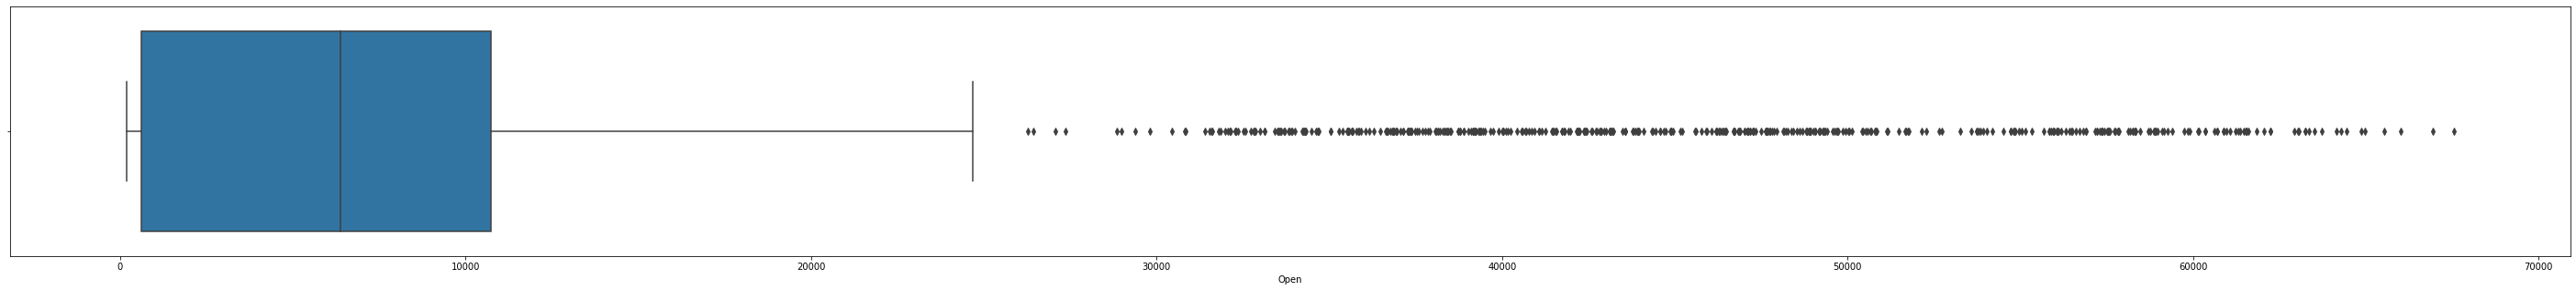

In [ ]:
df.keys()                                             #Llamamos las columnas

fig, ax = plt.subplots(figsize = (50, 5))              
sns.boxplot(data = df, x ='Open') 

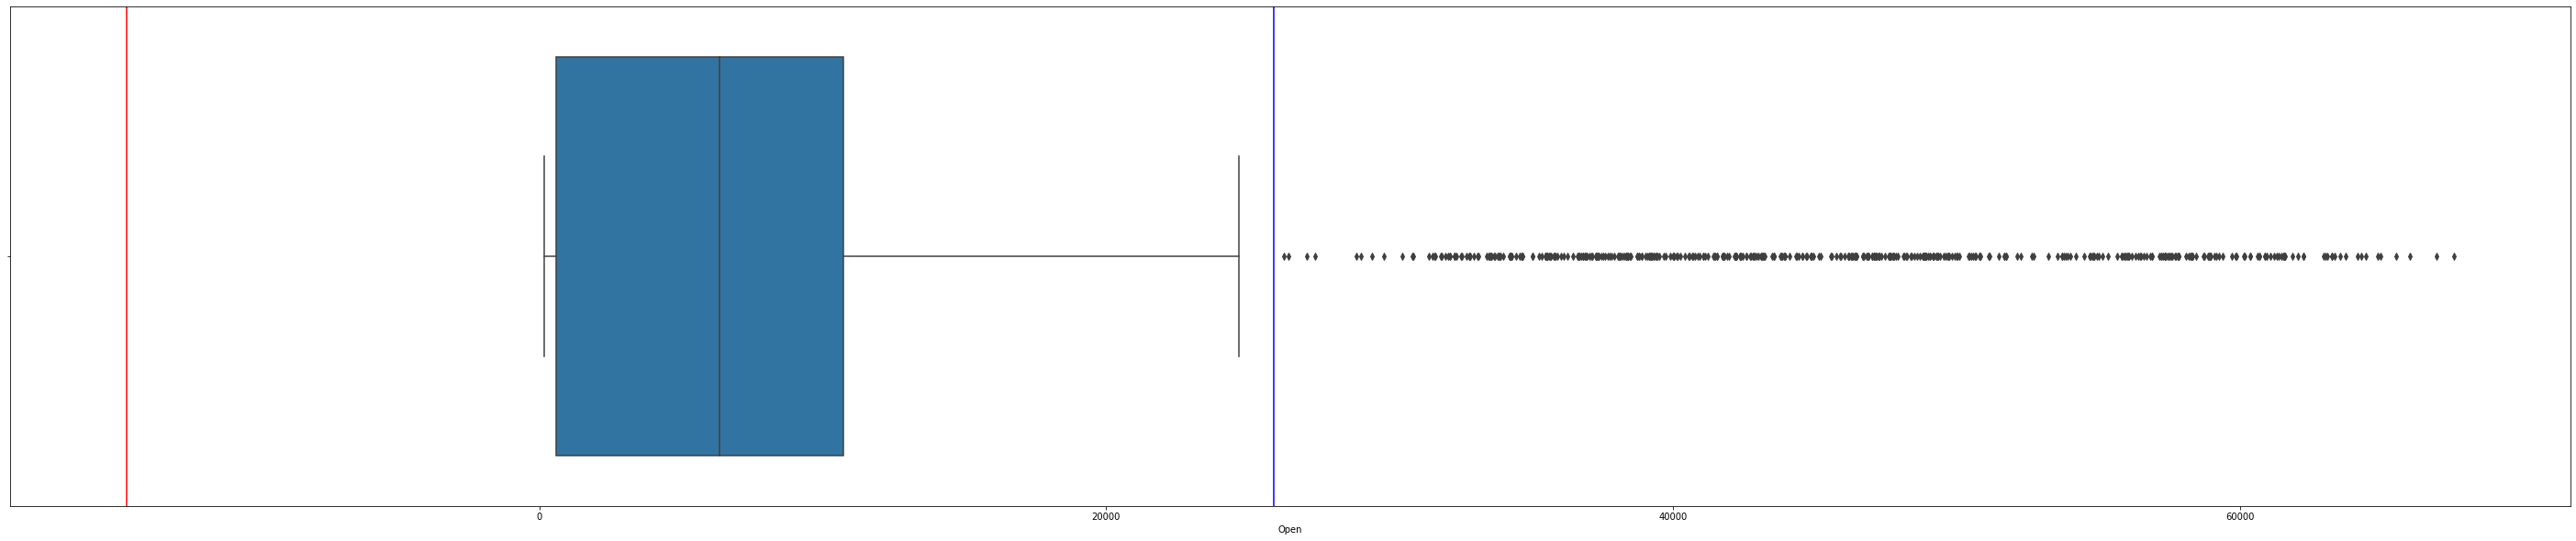

In [ ]:
df.keys()

fig, ax = plt.subplots(figsize = (50, 10))
sns.boxplot(data = df, x ='Open')
plt.axvline(Q2+(1.5*IQR), color="blue",label="Lim. Superior")
plt.axvline(Q1-(1.5*IQR), color="red",label="Lim. Inferior")

In [ ]:
print("coeficiente de asimetría ", df['Open'].skew( ))


print("coeficiente de curtosis ",df['Open'].kurtosis())

coeficiente de asimetría  1.7651475944861714
coeficiente de curtosis  1.8906193721070195


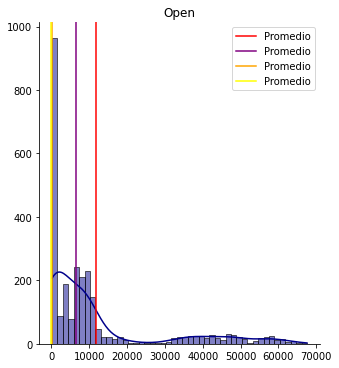

In [ ]:
sns.displot(df['Open'].values, color='darkblue', kde=True)
plt.title('Open')
plt.xlabel('')
plt.ylabel('')

plt.axvline(df['Open'].mean(), color='red', label='Promedio')
plt.axvline(df['Open'].median(), color='purple', label='Promedio')
plt.axvline(df['Open'].mode()[0], color='orange', label='Promedio')
plt.axvline(2.5, color='yellow', label='Promedio')
plt.legend()
plt.show()

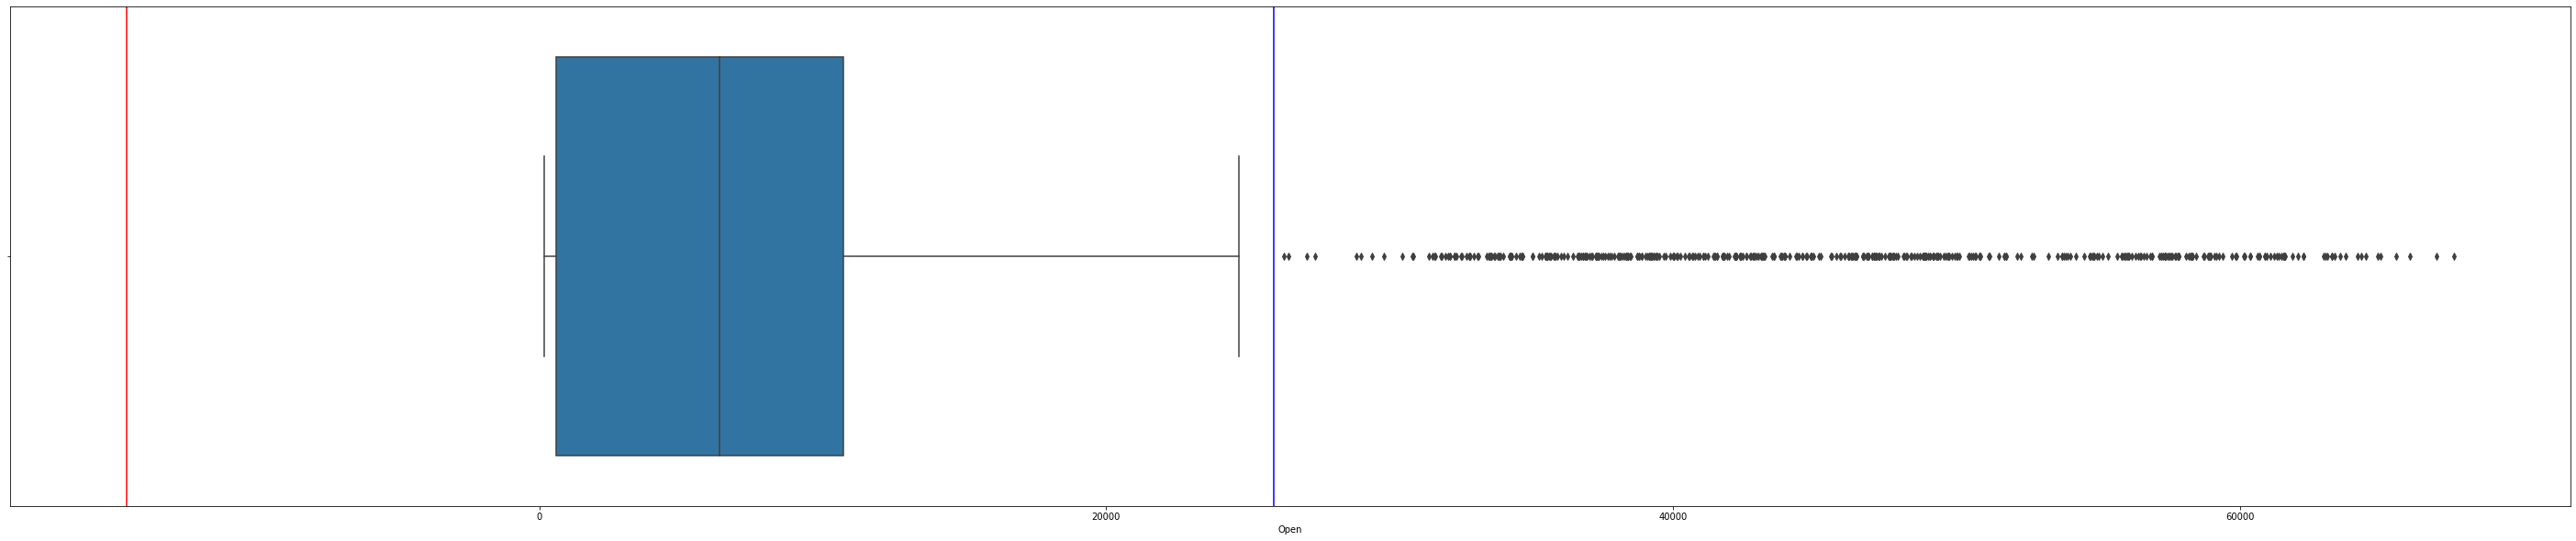

In [ ]:
df.keys()

fig, ax = plt.subplots(figsize = (50, 10))
sns.boxplot(data = df, x ='Open')
plt.axvline(Q2+(1.5*IQR), color="blue",label="Lim. Superior")
plt.axvline(Q1-(1.5*IQR), color="red",label="Lim. Inferior")

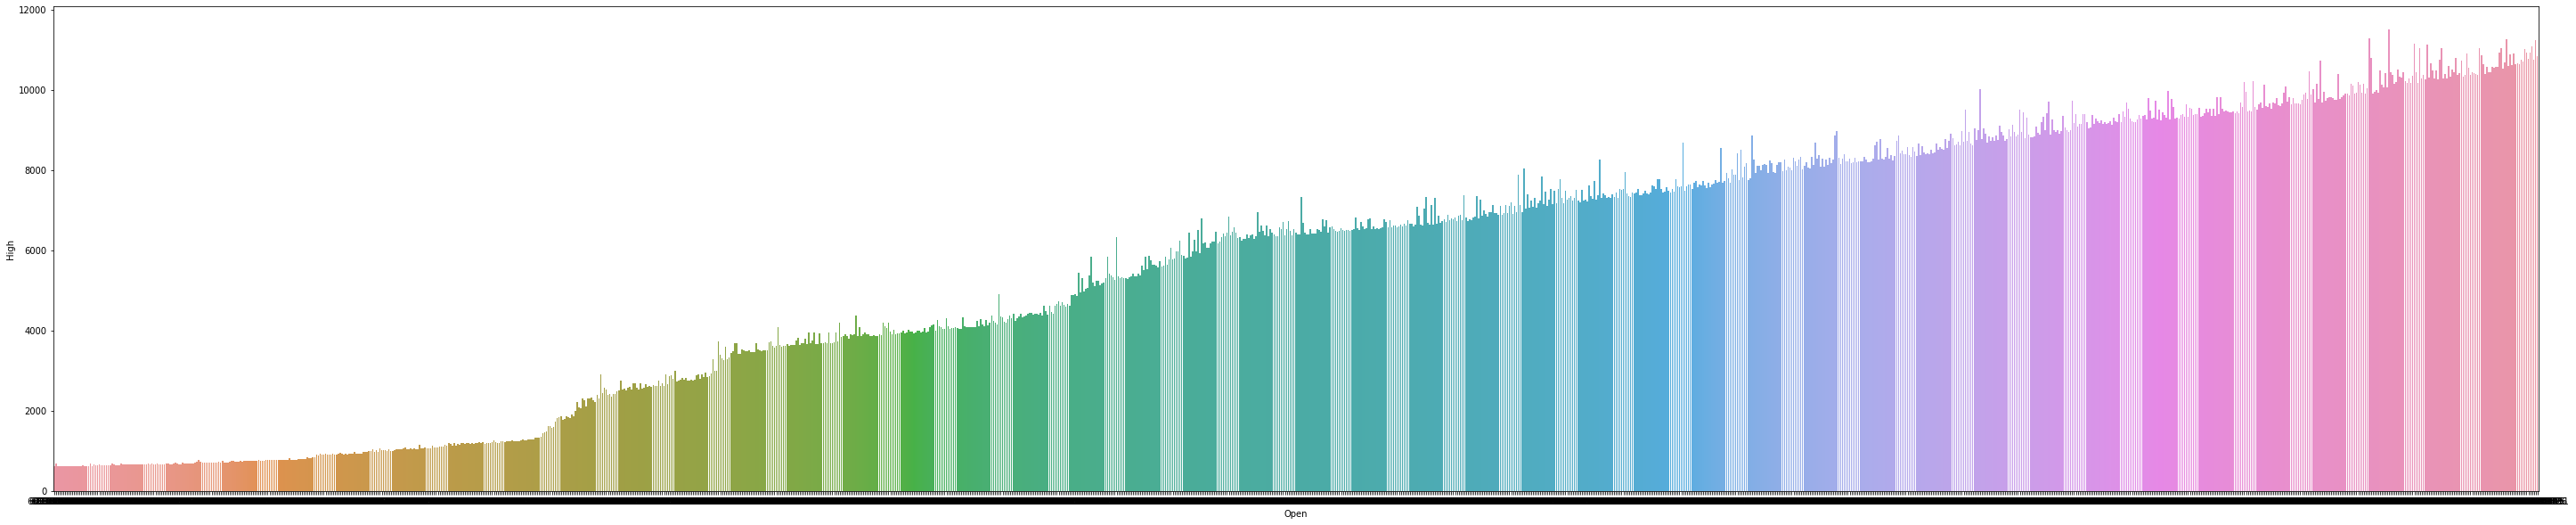

In [ ]:
df_f2 = df[(df['Open'] < 10728) & (df['Open'] > 609)]
fig, ax = plt.subplots(figsize = (50, 10))                       #fig = es el espacio
fig_1 = sns.barplot(y=df_f2['High'], x=df_f2['Open'])            # ax = La linea del marco
plt.show()
fig = fig_1.get_figure()
